<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 2</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mersad.esalati@gmail.com">Mersad Esalati</a><br></font><br>
    </div>
</div>

# Selenium

## Weather Info Crawler
Daily Weather Information:
- Temperature (°F) - only Avg metric
- Dew Point (°F) - only Avg metric
- Humidity (%) - only Avg metric
- Wind Speed (mph) - only Avg metric
- Pressure (in) - only Avg metric
- Precipitation (in) - only Avg metric
- date

In [3]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Downloading: 100%|█████████████████| 8.41M/8.41M [00:04<00:00, 2.00MB/s]
/var/folders/xz/xv6qyd0d6r18dzgq_j9xg1r80000gn/T/ipykernel_1965/3871533204.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [4]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import time
from tqdm import tqdm
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt  


## Download Capitalbikeshare Data
You can write script for download and extracting files or do it manualy.

In [5]:
driver = webdriver.Chrome(executable_path='chromedriver')
driver.get('https://www.wunderground.com/history/monthly/us/va/arlington/KDCA/date/2021-01')
driver.maximize_window()
time.sleep(4)
weather = pd.DataFrame({
    'Date':[],
    'Temperature':[],
    'Drew Point':[],
    'Hummidity':[],
    'Wind Speed':[],
    'Pressure':[],
    'Precipiration':[]
})
duplicate_one = True 
for month in tqdm(range(1,13)):
    weather_month = pd.DataFrame({
    'Date':[],
    'Temperature':[],
    'Drew Point':[],
    'Hummidity':[],
    'Wind Speed':[],
    'Pressure':[],
    'Precipiration':[]
    })
    duplicate_one = True 
    select = Select(driver.find_element(By.ID,'monthSelection'))
    select.select_by_value(str(month))
    driver.find_element(By.ID,'dateSubmit').click()
    time.sleep(5)
    days = driver.find_element(By.CSS_SELECTOR,'#inner-content > div.region-content-main > div.row > div:nth-child(5) > div:nth-child(1) > div > lib-city-history-observation > div > div.observation-table.ng-star-inserted > table > tbody > tr > td:nth-child(1) > table')
    days = days.text.split('\n')
    for day in tqdm(days[1:]):
        if (day == '1' and duplicate_one == True ) or (day != '1'):
            duplicate_one = False
            temperature = driver.find_element(By.CSS_SELECTOR,f'#inner-content > div.region-content-main > div.row > div:nth-child(5) > div:nth-child(1) > div > lib-city-history-observation > div > div.observation-table.ng-star-inserted > table > tbody > tr > td:nth-child(2) > table > tr:nth-child({int(day) + 1}) > td:nth-child(2)')                                       
            drew_point = driver.find_element(By.CSS_SELECTOR,f'#inner-content > div.region-content-main > div.row > div:nth-child(5) > div:nth-child(1) > div > lib-city-history-observation > div > div.observation-table.ng-star-inserted > table > tbody > tr > td:nth-child(3) > table > tr:nth-child({int(day) + 1}) > td:nth-child(2)')
            hummidity = driver.find_element(By.CSS_SELECTOR,f'#inner-content > div.region-content-main > div.row > div:nth-child(5) > div:nth-child(1) > div > lib-city-history-observation > div > div.observation-table.ng-star-inserted > table > tbody > tr > td:nth-child(4) > table > tr:nth-child({int(day) + 1}) > td:nth-child(2)')
            wind_speed = driver.find_element(By.CSS_SELECTOR,f'#inner-content > div.region-content-main > div.row > div:nth-child(5) > div:nth-child(1) > div > lib-city-history-observation > div > div.observation-table.ng-star-inserted > table > tbody > tr > td:nth-child(5) > table > tr:nth-child({int(day) + 1}) > td:nth-child(2)')
            pressure = driver.find_element(By.CSS_SELECTOR,f'#inner-content > div.region-content-main > div.row > div:nth-child(5) > div:nth-child(1) > div > lib-city-history-observation > div > div.observation-table.ng-star-inserted > table > tbody > tr > td:nth-child(6) > table > tr:nth-child({int(day) + 1}) > td:nth-child(2)')
            precipiration = driver.find_element(By.CSS_SELECTOR,f'#inner-content > div.region-content-main > div.row > div:nth-child(5) > div:nth-child(1) > div > lib-city-history-observation > div > div.observation-table.ng-star-inserted > table > tbody > tr > td:nth-child(7) > table > tr:nth-child({int(day) + 1}) > td')
            weather_month.loc[len(weather_month)] = [f'2021-{month}-{day}', temperature.text, drew_point.text, hummidity.text, wind_speed.text, pressure.text, precipiration.text]
            weather_month.to_csv(f'2021-{month}.csv')
    weather = pd.concat([weather, weather_month], ignore_index=True)
    
driver.close()
weather


WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home


## Question 1: Merge Weather Info Dataframes

In [130]:
weather.to_csv('weather.csv')

## Question 2: Merge Capitalbikeshare Dataframes

In [135]:
import os
capital_bike = pd.DataFrame({
    'ride_id':[],
    'rideable_type':[],
    'started_at':[],
    'ended_at':[],
    'start_station_name':[],
    'start_station_id':[],
    'end_station_name':[],
    'end_station_id':[],
    'start_lat':[],
    'start_lng':[],
    'end_lat':[],
    'end_lng':[],
    'member_casual':[]

})
dirList = os.listdir('data')
for path in tqdm(dirList):
    df = pd.read_csv(f'data/{path}')
    capital_bike = pd.concat([capital_bike, df], ignore_index=True)
capital_bike
    

  8%|▊         | 1/12 [00:00<00:09,  1.18it/s]C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_3320\3730936585.py:20: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'data/{path}')
100%|██████████| 12/12 [00:20<00:00,  1.68s/it]


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,13A48BD20CC3DD85,classic_bike,2021-01-08 17:58:48,2021-01-08 18:25:23,Connecticut Ave & Yuma St NW,31318.0,Georgia Ave & Emerson St NW,31405.0,38.947156,-77.065115,38.949662,-77.027333,casual
1,CA68C580B32EEE66,electric_bike,2021-01-08 22:05:51,2021-01-08 22:23:52,8th & D St NW,31270.0,14th & D St SE,31663.0,38.894804,-77.023091,38.884053,-76.986043,member
2,5A925307814D5C2B,classic_bike,2021-01-21 17:20:31,2021-01-21 17:23:24,Wilson Blvd. & N. Vermont St.,31926.0,George Mason Dr & Wilson Blvd,31036.0,38.879477,-77.114563,38.878870,-77.120700,member
3,B6B2DB54A2B233EE,classic_bike,2021-01-28 10:06:30,2021-01-28 10:20:54,Franklin St & S Washington St,31907.0,Braddock Rd Metro,31047.0,38.798133,-77.048700,38.814577,-77.052808,member
4,921A142D5C8A9759,classic_bike,2021-01-11 12:09:45,2021-01-11 12:20:15,St. Asaph & Montgomery St,31931.0,Braddock Rd Metro,31047.0,38.814185,-77.043809,38.814577,-77.052808,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749876,8C999F60CA429723,classic_bike,2021-12-15 18:26:44,2021-12-15 18:34:25,14th & Belmont St NW,31119.0,14th & Rhode Island Ave NW,31203.0,38.921074,-77.031887,38.908600,-77.032300,casual
2749877,CA9B6486BDC1D25A,electric_bike,2021-12-15 00:45:55,2021-12-15 00:49:46,14th & Belmont St NW,31119.0,14th & Irving St NW,31124.0,38.920981,-77.031653,38.928552,-77.032224,casual
2749878,95957793A0807E8B,classic_bike,2021-12-06 14:17:45,2021-12-06 14:29:26,15th & P St NW,31201.0,14th & Irving St NW,31124.0,38.909801,-77.034427,38.928552,-77.032224,member
2749879,99DA9A8F72185C79,docked_bike,2021-12-29 14:59:01,2021-12-29 16:29:40,10th St & L'Enfant Plaza SW,31287.0,10th St & L'Enfant Plaza SW,31287.0,38.884323,-77.026010,38.884323,-77.026010,casual


## Question 3: Data Cleaning

In [136]:
#a
#Remove NAN
capital_bike.dropna(axis=0, how='any', inplace=True)


In [137]:
import re

capital_bike = capital_bike.loc[capital_bike['started_at'].str.match(r"(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})") == True]
capital_bike = capital_bike.loc[capital_bike['ended_at'].str.match(r"(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})") == True]
capital_bike['started_at'] = pd.to_datetime(capital_bike['started_at'], format='%Y-%m-%d %H:%M:%S')
capital_bike['ended_at'] = pd.to_datetime(capital_bike['ended_at'], format='%Y-%m-%d %H:%M:%S')

In [138]:
capital_bike = capital_bike.loc[(capital_bike['ended_at'] - capital_bike['started_at']).dt.days < 1]
capital_bike


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,13A48BD20CC3DD85,classic_bike,2021-01-08 17:58:48,2021-01-08 18:25:23,Connecticut Ave & Yuma St NW,31318.0,Georgia Ave & Emerson St NW,31405.0,38.947156,-77.065115,38.949662,-77.027333,casual
1,CA68C580B32EEE66,electric_bike,2021-01-08 22:05:51,2021-01-08 22:23:52,8th & D St NW,31270.0,14th & D St SE,31663.0,38.894804,-77.023091,38.884053,-76.986043,member
2,5A925307814D5C2B,classic_bike,2021-01-21 17:20:31,2021-01-21 17:23:24,Wilson Blvd. & N. Vermont St.,31926.0,George Mason Dr & Wilson Blvd,31036.0,38.879477,-77.114563,38.878870,-77.120700,member
3,B6B2DB54A2B233EE,classic_bike,2021-01-28 10:06:30,2021-01-28 10:20:54,Franklin St & S Washington St,31907.0,Braddock Rd Metro,31047.0,38.798133,-77.048700,38.814577,-77.052808,member
4,921A142D5C8A9759,classic_bike,2021-01-11 12:09:45,2021-01-11 12:20:15,St. Asaph & Montgomery St,31931.0,Braddock Rd Metro,31047.0,38.814185,-77.043809,38.814577,-77.052808,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749876,8C999F60CA429723,classic_bike,2021-12-15 18:26:44,2021-12-15 18:34:25,14th & Belmont St NW,31119.0,14th & Rhode Island Ave NW,31203.0,38.921074,-77.031887,38.908600,-77.032300,casual
2749877,CA9B6486BDC1D25A,electric_bike,2021-12-15 00:45:55,2021-12-15 00:49:46,14th & Belmont St NW,31119.0,14th & Irving St NW,31124.0,38.920981,-77.031653,38.928552,-77.032224,casual
2749878,95957793A0807E8B,classic_bike,2021-12-06 14:17:45,2021-12-06 14:29:26,15th & P St NW,31201.0,14th & Irving St NW,31124.0,38.909801,-77.034427,38.928552,-77.032224,member
2749879,99DA9A8F72185C79,docked_bike,2021-12-29 14:59:01,2021-12-29 16:29:40,10th St & L'Enfant Plaza SW,31287.0,10th St & L'Enfant Plaza SW,31287.0,38.884323,-77.026010,38.884323,-77.026010,casual


## Question 4: Join Dataframes

In [139]:

capital_bike['started_at'] = capital_bike['started_at'].dt.strftime('%Y-%m-%d')
weather['Date'] = pd.to_datetime(weather['Date'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')


In [140]:

join_df = weather.set_index('Date').join(capital_bike.set_index('started_at'), how='inner')
join_df.reset_index(names='date', inplace=True)


## Question 5: Histograms

### Humidity

In [74]:
join_df.Hummidity.value_counts().sort_index()

24.5    13231
26.2     3085
30.0     9166
33.1     9851
34.9     7325
        ...  
92.2     4669
92.7      910
92.9     1621
93.3     1672
93.5     1593
Name: Hummidity, Length: 262, dtype: int64

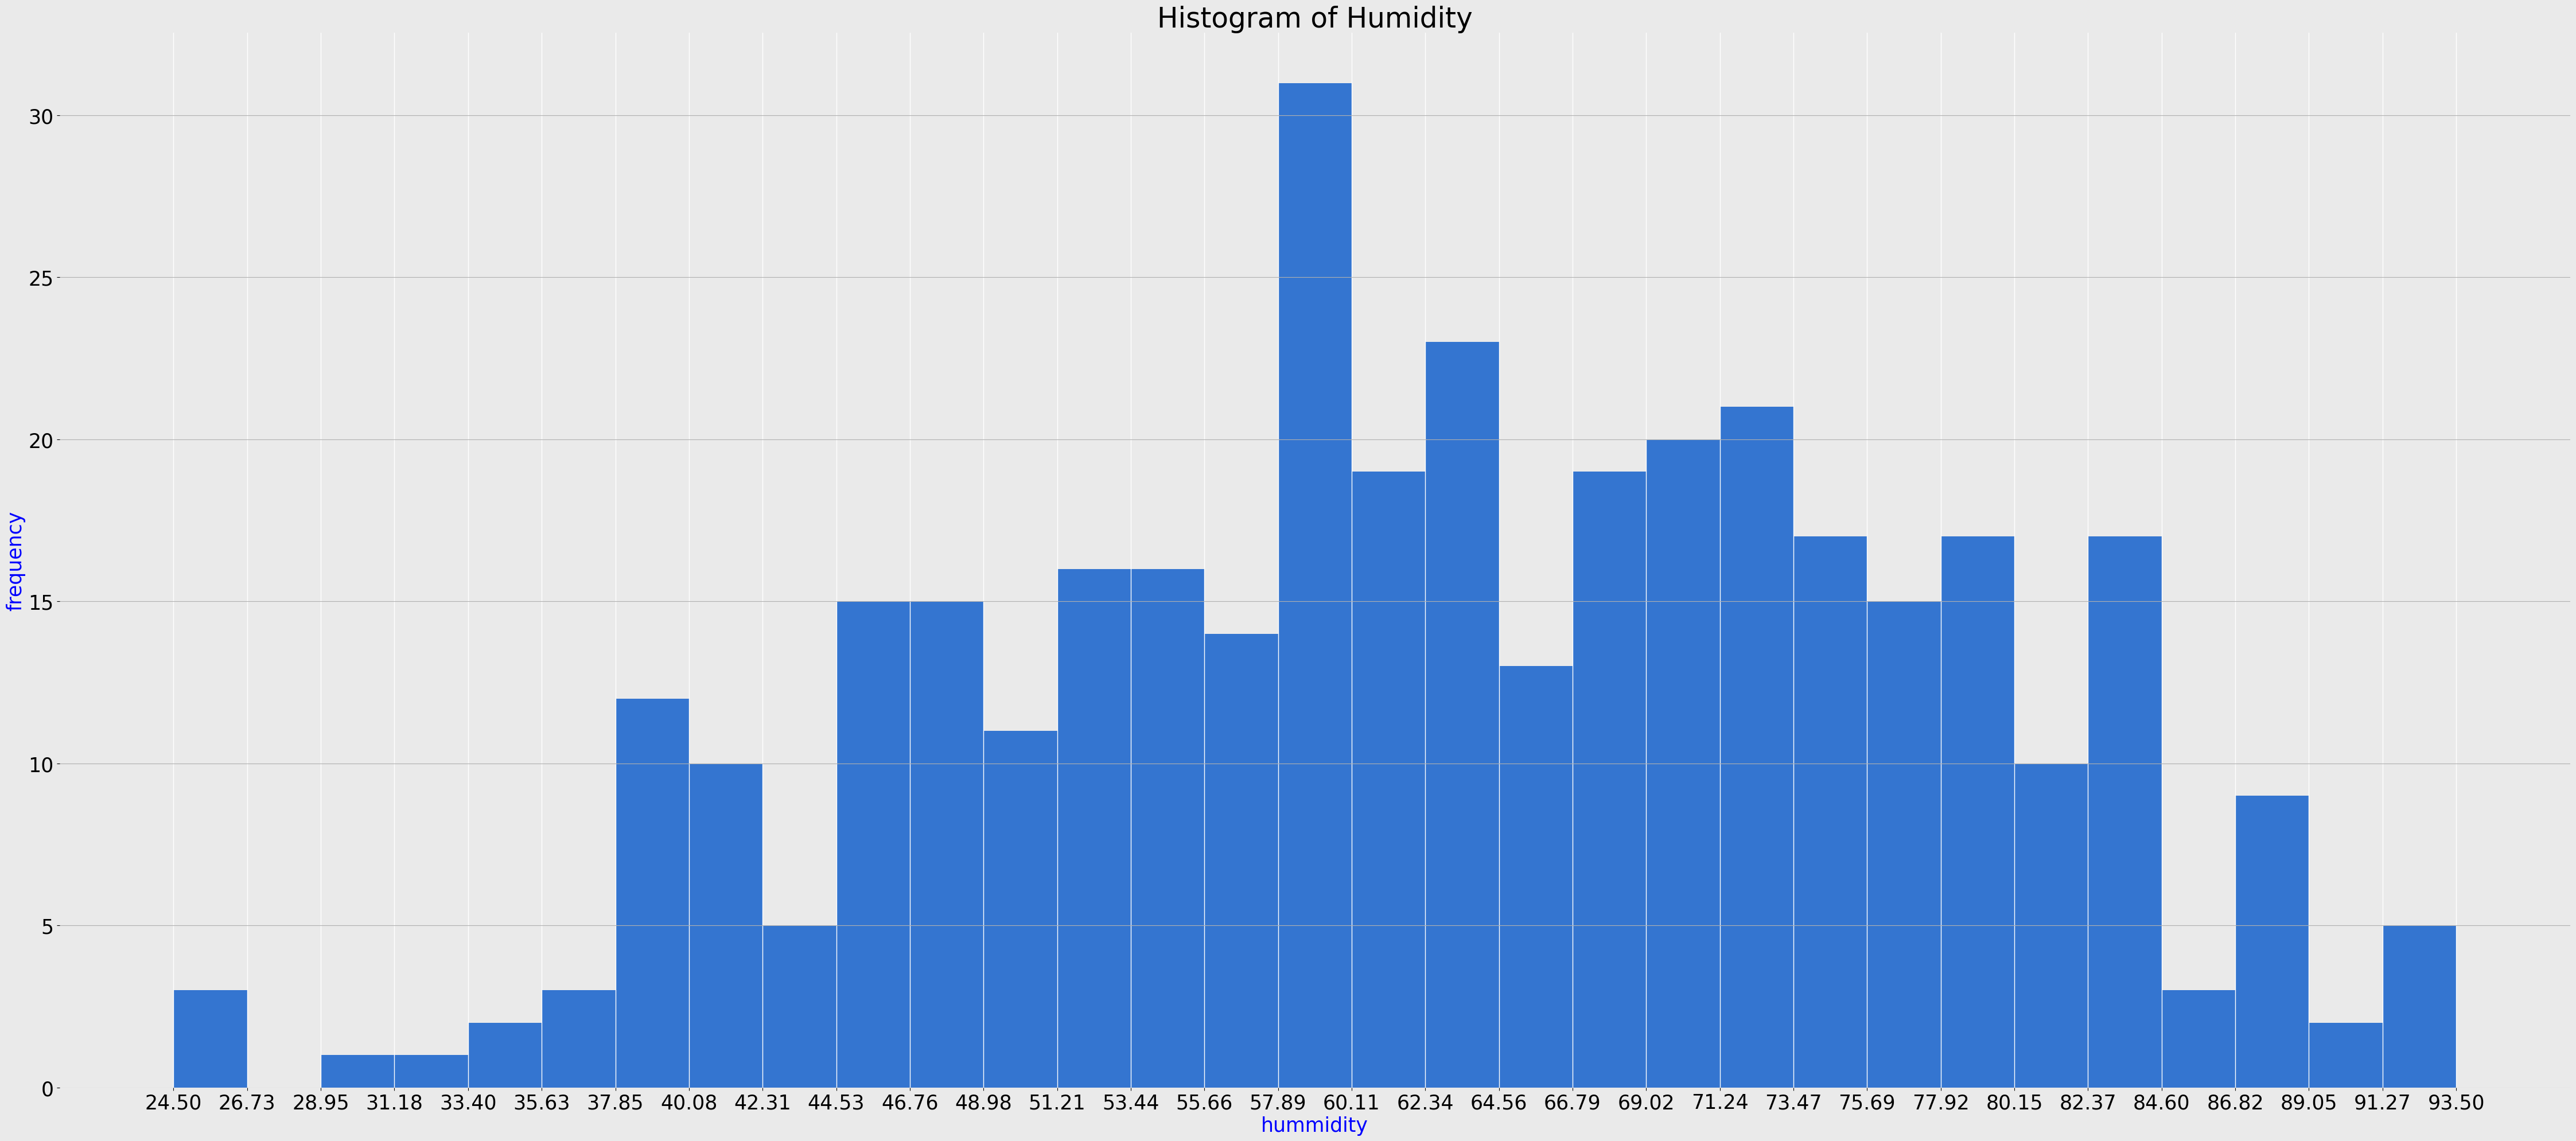

In [151]:
weather['Hummidity'] = weather['Hummidity'].astype(float)
fig, ax = plt.subplots(1, figsize=(45,20), facecolor='#EAEAEA')
ax.set_facecolor('#EAEAEA')
n, bins, patches = plt.hist(weather['Hummidity'],  bins = int(float(weather['Hummidity'].max())/3), color = '#3475D0')
plt.grid(color='white', lw = 1, axis='x',)
plt.xticks(bins, fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('hummidity',fontsize = 25, c= 'blue')
plt.ylabel('frequency',fontsize = 25, c = 'blue')
plt.title("Histogram of Humidity", fontsize = 35)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.grid(True)
plt.show()


### Temperature

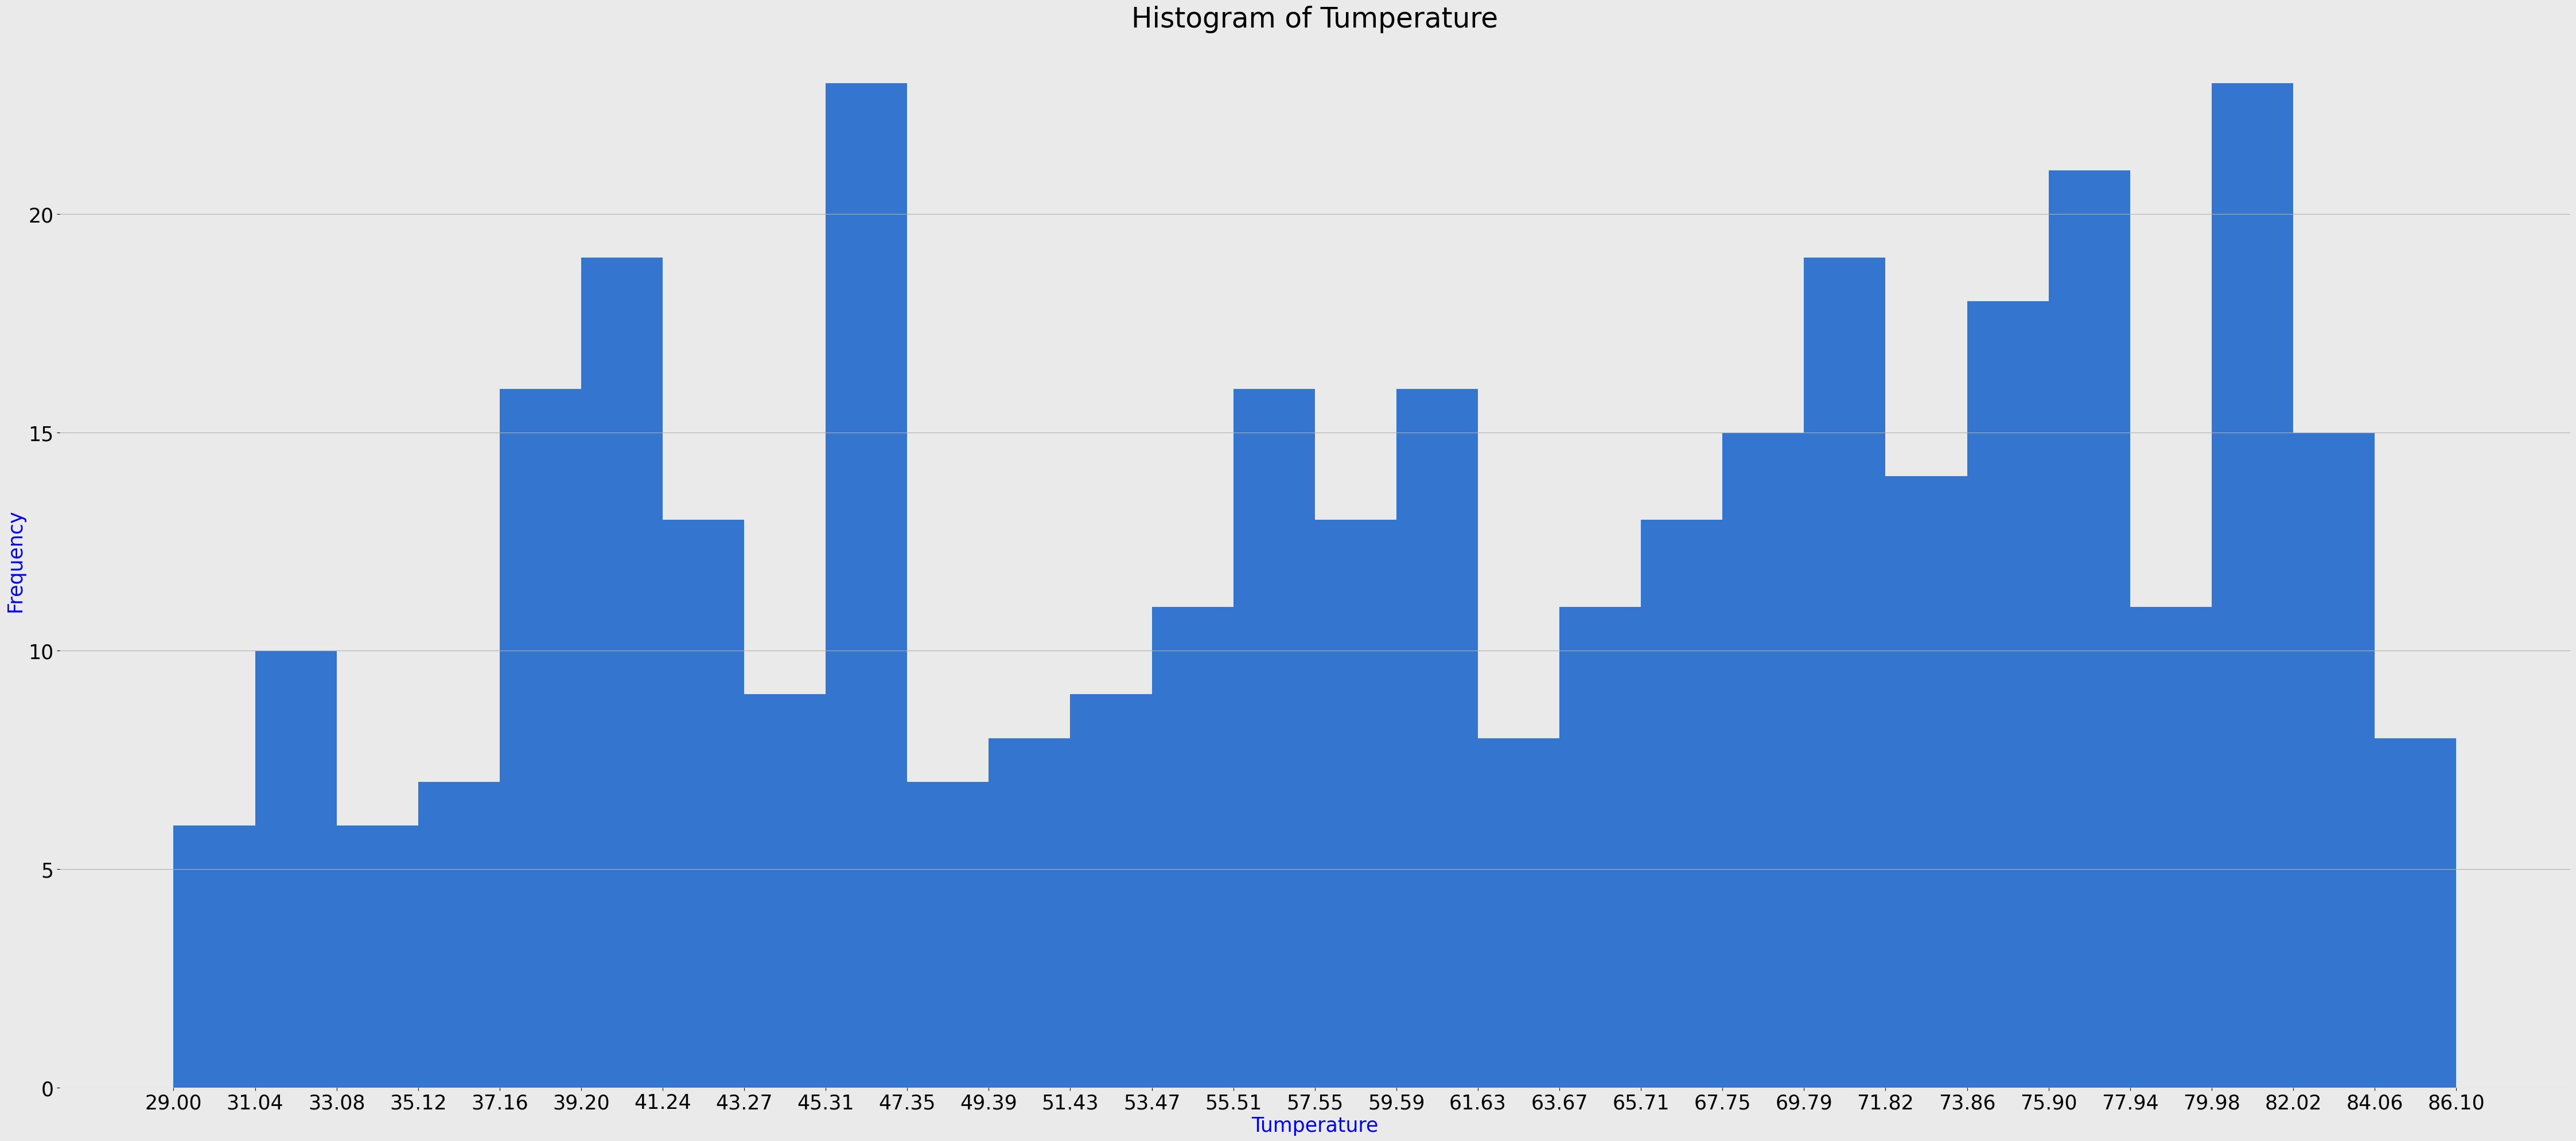

In [168]:
weather['Temperature'] = weather['Temperature'].astype(float)
max_temp = weather['Temperature'].max()
fig, ax = plt.subplots(1, figsize=(45,20), facecolor='#EAEAEA')
n, bins, patches = plt.hist(weather['Temperature'], bins=int(max_temp/3), color = '#3475D0')
ax.set_facecolor('#EAEAEA')
plt.grid(color='white', lw = 1, axis='x',)
plt.xticks(bins, fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Tumperature',fontsize = 25, c= 'blue')
plt.ylabel('Frequency',fontsize = 25, c = 'blue')
plt.title("Histogram of Tumperature", fontsize = 35)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid()
plt.tight_layout()



## Question 6: Line Plot

In [90]:
join_df['Temperature'] = join_df['Temperature'].astype(float)
len(join_df['date'].drop_duplicates())
tr  = join_df.groupby('date')['Temperature'].mean()
tr

date
2021-01-01    37.4
2021-01-02    43.8
2021-01-03    40.5
2021-01-04    40.4
2021-01-05    40.9
              ... 
2021-12-27    41.3
2021-12-28    48.2
2021-12-29    50.2
2021-12-30    50.6
2021-12-31    53.1
Name: Temperature, Length: 363, dtype: float64

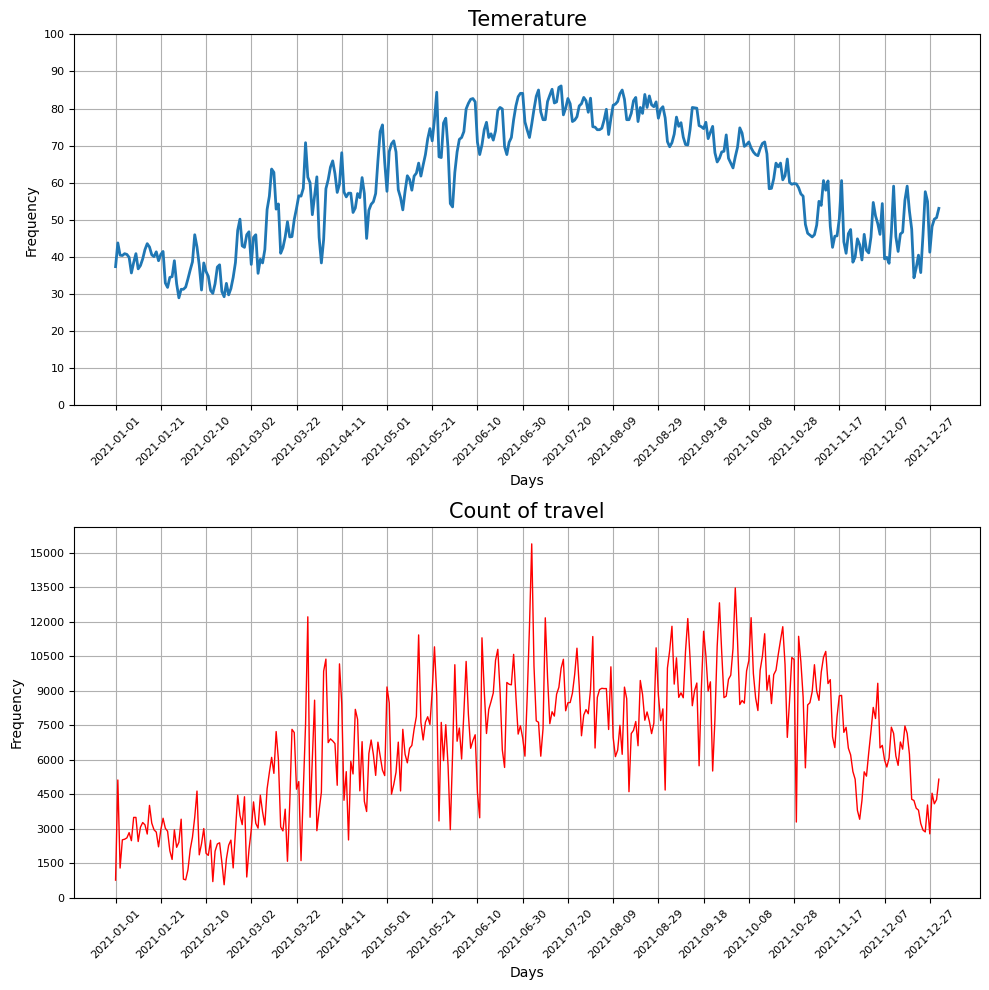

In [194]:

join_df['Temperature'] = join_df['Temperature'].astype(float)
travel = join_df.groupby('date')['date'].count()
temp = join_df.groupby('date')['Temperature'].mean()

len_date = len(join_df['date'].drop_duplicates())
plt.figure(figsize=(10,10))


#plt 1
plt.subplot(2,1,1)
plt.plot(join_df['date'].drop_duplicates(),temp, label='Temperature', linewidth = 2)
plt.xticks([weather['Date'][i] for i in range(0,len_date,20)], fontsize = 8, rotation= 45)
plt.yticks([i for i in range(0,101,10)], fontsize = 8)
plt.grid('True')
plt.ylim(ymin = 0)
plt.xlabel('Days', fontdict={'fontsize':10})
plt.ylabel('Frequency' , fontdict={'fontsize':10})
plt.title('Temerature', fontdict={'fontsize':15})
plt.tight_layout()
#plt2
plt.subplot(2,1,2)
plt.plot(travel, label='Count of travel' , color = 'red', linewidth = 1)
plt.xticks([weather['Date'][i] for i in range(0,len_date,20)], fontsize = 8, rotation= 45)
plt.yticks([i for i in range(0,16000,1500)], fontsize = 8)
plt.grid('True')
plt.ylim(ymin = 0)
plt.xlabel('Days', fontdict={'fontsize':10})
plt.ylabel('Frequency' , fontdict={'fontsize':10})
plt.title('Count of travel', fontdict={'fontsize':15})
plt.tight_layout()


plt.show()